In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from subprocess import check_output

noshow = pd.read_csv('noshow.csv')
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
noshow.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [19]:
noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Let's clean the dataset first.
-  Correct the column names

In [20]:
noshow.rename(columns={'Handcap' : 'Handicap',
                      'Hipertension' : 'Hypertension'}, inplace=True)
noshow.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

- Incorrect data-- Age cannot be -1!

In [21]:
noshow = noshow[noshow['Age'] >= 0]

In [22]:
noshow['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

Luckily, there was only one incorrect age value and we could keep the rest of data.

People are about 4 times more likely to not visit doctors after making a reservation.

In [23]:
noshow['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

When I briefly navigated the dataset at first with noshow.describe(), I assumed the maximum value(4) of the handicap column was a typo because I thought the column only consisted of 2 categorical data(0 and 1). However, we can clearly see the handicap column is not simply comprised of 0 and 1, but also of 2, 3, and 4. This shows when the data from each patient was recorded, the degree of patients' disabilities was considered as well.

Now, let's get started our analysis!

# 1. Scheduled & Appointment Day

ScheduledDay and AppointmentDay columns are object type, which means they're string. To calculate the difference of two days, I will convert every data from both columns into datetime type.

In [24]:
def todatetime(string):
    to_datetime = datetime.datetime.strptime(string, '%Y-%m-%dT%H:%M:%SZ')
    return to_datetime

noshow['AppointmentDay'] = noshow['AppointmentDay'].apply(todatetime)
noshow['ScheduledDay'] = noshow['ScheduledDay'].apply(todatetime)
noshow.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                   object
dtype: object

Now we can see those two columns consist of datetime64 type :)

In [25]:
noshow['Awaiting'] = noshow['AppointmentDay'] - noshow['ScheduledDay']
noshow['Awaiting'] = noshow['Awaiting'].apply(lambda x: x.total_seconds() / (3600 * 24))
noshow['Awaiting'] = noshow['Awaiting'].apply(lambda x: int(np.floor(x+1)))
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Awaiting
0,2.990000e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.590000e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.260000e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.680000e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.840000e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


Since all appointment days' times were set to 00:00:00, when I converted the column into datetime64 type, the time portions have disappeared. And because of that, time portions are missing in the appointmentday column.

In addition, I did some calculations for better understanding of the awaiting time between scheduled day and appointment day. As you can see, if the data in the "Awaiting" column is 0, the patient was supposed to come to the hosital on the day he or she made a reservation.

In [26]:
print(sorted(noshow['Awaiting'].unique()))
print(len(noshow[noshow['Awaiting'] < 0]))

[-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]
5


There are 5 data with its awaiting data less than 0. This seems to be caused by mistakes.
Let's delete these data!

In [27]:
noshow = noshow[noshow['Awaiting'] >= 0]
print(sorted(noshow['Awaiting'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


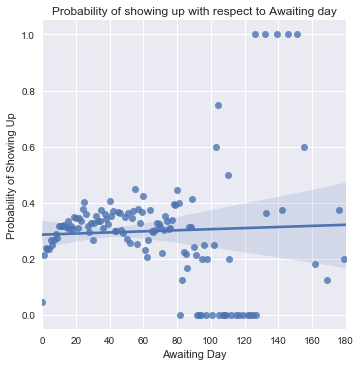

In [28]:
def probStatus(dataset, group_by):
    df = pd.crosstab(index = dataset[group_by], columns = dataset['No-show']).reset_index()
    df['probShowUp'] = df['Yes'] / (df['Yes'] + df['No'])
    return df[[group_by, 'probShowUp']]

%matplotlib inline
sns.lmplot(data = probStatus(noshow, 'Awaiting'), x = 'Awaiting', y = 'probShowUp', fit_reg = True)
sns.plt.xlim(0, 180)
sns.plt.title('Probability of showing up with respect to Awaiting day')
plt.xlabel('Awaiting Day')
plt.ylabel('Probability of Showing Up')
sns.plt.show()

This graph shows that the probability whether patients show up to the consultation does not have much to do with awaiting time.

# 2. Gender

### 1) Who makes a reservation more often?


In [29]:
noshow['Gender'].value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

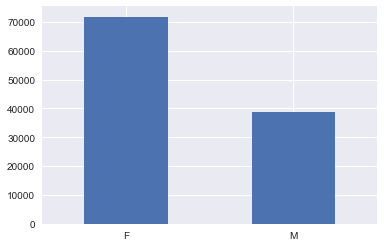

In [30]:
noshow['Gender'].value_counts().plot.bar()
plt.xticks(rotation=0)

We can observe females are about twice more likely to make an appointment with a doctor than males.

Possibile reasons why women visit doctors more than men do?
- Probably it has to do with mainly for gynaecological and reproductive issues in women's reproductive years. According to endocrinologist Dr Sonia Davisone,([link](https://jeanhailes.org.au/news/why-women-see-their-gp-more-than-men)) women have fluctuating hormone levels throughout their reproductive life, and so are more likely to have issues relating to menstrual cycles (irregular or absent periods, heavy or painful periods, PMS), fertility issues (wanting to avoid pregnancy or to achieve it) and erratic hormone production as menopause approaches. And all these reasons may bring women to their doctors more frequently than men.

How will this change throughout their lives? Who will visit more doctors in adolescence, in their 20's, or in their later lives?

I will further investigate the relation between gender and the age later, among those who did not show up to the consultation.

### 2) Who is more likely to no-show to the consultation?

In [31]:
gender_noshow = noshow.groupby(['Gender', 'No-show']).size()
gender_noshow

Gender  No-show
F       No         57245
        Yes        14591
M       No         30962
        Yes         7723
dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

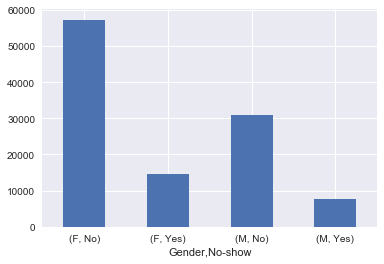

In [32]:
gender_noshow.plot.bar()
plt.xticks(rotation=0)

In [33]:
gender_noshow_rate = gender_noshow.groupby(level=0).apply(lambda x: x/float(x.sum()))
gender_noshow_rate

Gender  No-show
F       No         0.796885
        Yes        0.203115
M       No         0.800362
        Yes        0.199638
dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

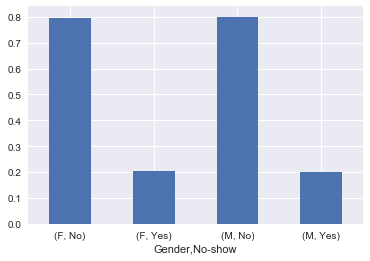

In [34]:
gender_noshow_rate.plot.bar()
plt.xticks(rotation=0)

There is not enough correlation between gender and the possibility of not showing up on the d-day.

In both gender, however, no-show rate is pretty high, reaching about 0.8, which tells us how seriously this issue needs to be dealt with, considering its massive effects both on hospital staffs and on other patients who urgently need to consult doctors.

### 3) Gender and Age

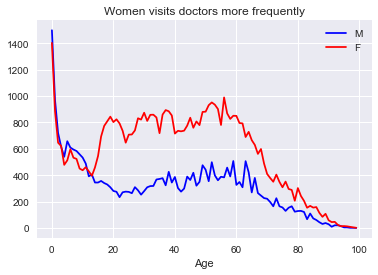

In [35]:
#From now on, we will only work with patients' data who did not come to hospitals.
noshow = noshow[noshow['No-show'] == 'No'] 
range_noshow = pd.DataFrame()
range_noshow['Age'] = range(100)
men = range_noshow['Age'].apply(lambda x: len(noshow[(noshow['Age'] == x) & (noshow['Gender'] == 'M')]))
women = range_noshow['Age'].apply(lambda x: len(noshow[(noshow['Age'] == x) & (noshow['Gender'] == 'F')]))

plt.plot(range(100), men, color = 'b')
plt.plot(range(100), women, color = 'r')
plt.legend(['M', 'F'])
plt.xlabel('Age')
plt.title('Women visits doctors more frequently')

We can observe until 15, boys tend to visit doctors more often than girls. However, from around that age, the gap between the number of women attending the doctor and that of men is widening and women tend to visit doctors more till the late stage in their lives.

Interestingly enough, their is a sudden and huge increase of females seeing doctors, starting from the age of 15. This pretty much makes sense considering the causes I've mentioned above that because of sudden changes girls experience while approaching their puberty period, they would need more consultations and checkups from doctors.

However, other than biological differences that may have influenced different likelihood of visiting doctors between men and women, we should also examine other factors to better understand why men go to see a doctor less often than women.

There might be social, economic, and psychological aspects to be considered as well. And plus, if certain diseases are found to be more vulnerable to a certain gender, this would also bring women or men to doctors more.

# 3. Scholarship

In [36]:
noshow['Scholarship'].value_counts()

0    79924
1     8283
Name: Scholarship, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

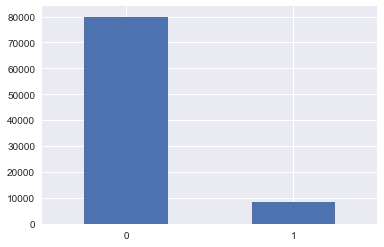

In [37]:
noshow['Scholarship'].value_counts().plot.bar()
plt.xticks(rotation=0)

People who do not get scholarship tend to miss their consultations more often than those who get scholarship.

Gender  Scholarship
F       0              50498
        1               6747
M       0              29426
        1               1536
dtype: int64
Gender  Scholarship
F       0              0.882138
        1              0.117862
M       0              0.950391
        1              0.049609
dtype: float64


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

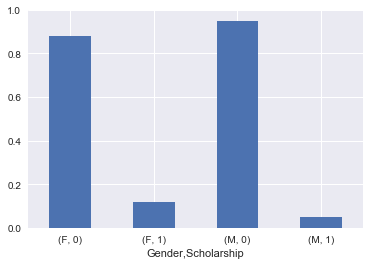

In [38]:
scholarship_noshow = noshow.groupby(['Gender', 'Scholarship']).size()
print(scholarship_noshow)
scholarship_ns_rate = scholarship_noshow.groupby(level=0).apply(lambda x: x/float(x.sum()))
print(scholarship_ns_rate)
scholarship_ns_rate.plot.bar()
plt.xticks(rotation=0)

Among those who didn't show up to the consultation, women are more likely to get scholarship from the government than men. But it has no significant differences.

# 4. SMS 

0    62509
1    25698
Name: SMS_received, dtype: int64


(array([0, 1]), <a list of 2 Text xticklabel objects>)

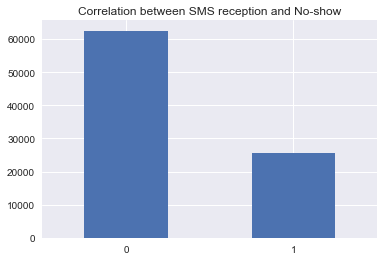

In [39]:
noshow_sms = noshow['SMS_received'].value_counts()
print(noshow_sms)
noshow_sms.plot.bar()
plt.title('Correlation between SMS reception and No-show')
plt.xticks(rotation=0)

0 indicates people didn't get a SMS and 1 indicates people received a SMS from hospitals before their consultations. From this graph we can see the correlation between SMS reception and the chance of no-show-- the less likely people get notice of their consultation from the hospital, the more likely they would not come to see a doctor.

# 5. Health Conditions

In [40]:
condition_rate = {}
total_num = noshow.shape[0]
conditions = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
for con in conditions:
    #The reason i put >= instead of == is because the 'Handicap' column consists of 5 categorical values.
    rate = (noshow[con] >= 1).sum() / total_num 
    condition_rate[con] = rate
condition_rate

{'Alcoholism': 0.030417087079256749,
 'Diabetes': 0.073837677281848382,
 'Handicap': 0.020792000634870248,
 'Hypertension': 0.20439420907637715}

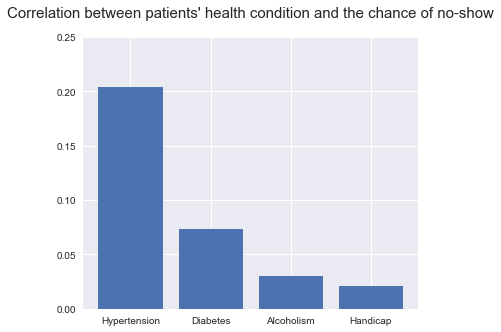

In [43]:
fig, ax = plt.subplots(figsize = (6,5))
plt.bar(range(len(condition_rate)), condition_rate.values(), align='center')
plt.xticks(range(len(condition_rate)), condition_rate.keys())
ax.set_ylim(0,0.250)
#ax.set_xlabel('Health conditions', size=15)
ax.set_title('Correlation between patients\' health condition and the chance of no-show', size=15)
ax.title.set_position([.5, 1.05])

People with hypertension are more likely to not show up to the appoinment than other patients.

What's interesting is before analyzing and plotting the data given, I assumed alcoholism might account for the main reason why people don't come to see their doctors but the result above shows that alcoholism only accounts for 3 percent of the total number of no-show.

In the original dataset i was given, there were only 4 health conditions which i could work with to analyze possible correlation between the chance of no-show. From the fact that all these 4 conditions especially diabetes, alcoholism, and handicap have pretty low rates, we get to realize that we should consider other health conditions as well that might have affected people's tendency of not visiting doctors after making appointments.